In [ ]:
    import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
from google.colab import files  # 코랩 파일 다운로드용

# 1. 나만의 CS 키워드 정의 (Regex 매칭을 위해 소문자로 작성)
CS_KEYWORDS = [
    'ai', 'artificial intelligence', 'tech', 'technology', 'digital',
    'data', 'cyber', 'crypto', 'semiconductor', 'nvidia', 'chip',
    'google', 'microsoft', 'apple', 'meta', 'algorithm', 'software',
    'cloud', 'robot', 'ev', 'electric vehicle'
]

def relabel_category(headline, original_category):
    """키워드 기반 카테고리 재분류 (Regex 사용)"""
    headline_lower = headline.lower()

    for keyword in CS_KEYWORDS:
        # 단어 경계(\b)를 포함하여 'Again'이 'AI'로 인식되는 문제 해결
        pattern = r'\b' + re.escape(keyword) + r'\b'
        if re.search(pattern, headline_lower):
            return 'CS_Insight'

    return original_category

def get_news_data():
    # 여러 언론사 RSS 모음 (차단 방지용 안전한 조합)
    rss_urls = {
        # Politics
        'Politics_NYT': 'https://rss.nytimes.com/services/xml/rss/nyt/Politics.xml',
        'Politics_HuffPost': 'https://www.huffpost.com/section/politics/feed',
        # Economy
        'Economy_NYT': 'https://rss.nytimes.com/services/xml/rss/nyt/Business.xml',
        'Economy_BBC': 'http://feeds.bbci.co.uk/news/business/rss.xml',
        'Economy_CNBC': 'https://www.cnbc.com/id/10000664/device/rss/rss.html',
        # Technology (핵심)
        'Technology_NYT': 'https://rss.nytimes.com/services/xml/rss/nyt/Technology.xml',
        'Technology_BBC': 'http://feeds.bbci.co.uk/news/technology/rss.xml',
        'Technology_Wired': 'https://www.wired.com/feed/rss',
        'Technology_Verge': 'https://www.theverge.com/rss/index.xml',
        # Society
        'Society_NYT': 'https://rss.nytimes.com/services/xml/rss/nyt/Health.xml',
        'Society_BBC': 'http://feeds.bbci.co.uk/news/health/rss.xml',
        # Sports
        'Sports_NYT': 'https://rss.nytimes.com/services/xml/rss/nyt/Sports.xml',
        'Sports_BBC': 'http://feeds.bbci.co.uk/news/sport/rss.xml'
    }

    news_data = []
    print("🚀 뉴스 데이터 수집을 시작합니다...")

    # 브라우저인 척 헤더 설정 (차단 방지)
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/91.0.4472.124 Safari/537.36"
    }

    for key, url in rss_urls.items():
        category_name = key.split('_')[0] # 'Politics_NYT' -> 'Politics'

        try:
            response = requests.get(url, headers=headers, timeout=5)
            # 파서 선택 (lxml 없으면 html.parser)
            try:
                soup = BeautifulSoup(response.content, 'xml')
            except:
                soup = BeautifulSoup(response.content, 'html.parser')

            items = soup.find_all('item')
            print(f"[{category_name}] {len(items)}개 발견 ({key})")

            for item in items:
                title = item.title.text.strip()
                if title:
                    # 재분류 로직 적용
                    final_label = relabel_category(title, category_name)
                    news_data.append({
                        'headline': title,
                        'original_category': category_name,
                        'category': final_label
                    })

        except Exception as e:
            print(f"Error fetching {key}: {e}")

    if not news_data:
        print("❌ 수집된 데이터가 없습니다.")
        return

    # 데이터프레임 변환 및 저장
    df = pd.DataFrame(news_data)
    df = df.drop_duplicates(subset=['headline'])

    # 파일명 생성
    file_name = 'news_dataset_colab.csv'
    df.to_csv(file_name, index=False, encoding='utf-8-sig')

    print("-" * 30)
    print(f"✅ 총 {len(df)}개 데이터 수집 완료!")
    print(df['category'].value_counts())

    # 코랩에서 로컬 컴퓨터로 파일 다운로드
    files.download(file_name)

# 실행
get_news_data()

🚀 뉴스 데이터 수집을 시작합니다...
[Politics] 20개 발견 (Politics_NYT)
[Politics] 40개 발견 (Politics_HuffPost)
[Economy] 50개 발견 (Economy_NYT)
[Economy] 52개 발견 (Economy_BBC)
[Economy] 30개 발견 (Economy_CNBC)
[Technology] 32개 발견 (Technology_NYT)
[Technology] 40개 발견 (Technology_BBC)
[Technology] 50개 발견 (Technology_Wired)
[Technology] 0개 발견 (Technology_Verge)
[Society] 20개 발견 (Society_NYT)
[Society] 106개 발견 (Society_BBC)
[Sports] 0개 발견 (Sports_NYT)
[Sports] 0개 발견 (Sports_BBC)
------------------------------
✅ 총 409개 데이터 수집 완료!
category
Society       116
Economy       100
Technology     77
Politics       59
CS_Insight     57
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# 그래프 스타일 설정 (가독성을 위해)
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.2)

# CSV 파일 로드 (파일명이 다르다면 수정해주세요)
file_path = 'news_dataset_colab.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ 데이터 로드 성공!")
    print(f"총 데이터 개수: {len(df)}개")
except FileNotFoundError:
    print("❌ 파일을 찾을 수 없습니다. 크롤링 코드를 먼저 실행해주세요.")

✅ 데이터 로드 성공!
총 데이터 개수: 409개


### 중복 데이터 (Duplicates) 점검
RSS 피드 특성상 시간차를 두고 동일한 기사가 중복 수집될 가능성이 있어, 이를 사전에 제거하지 않으면 모델 평가 시 **Train/Test 데이터 누수(Leakage)** 나 **과적합(Overfitting)** 을 유발할 수 있다.

- **검증 방법:** `duplicated(subset=['headline'])` 함수를 통해 기사 제목이 완벽히 동일한 샘플을 탐지하였다.
- **검증 결과:** 중복된 샘플 개수는 0 개로 확인되었다.
- **결론:** 데이터 수집 단계에서의 1차 전처리 로직이 정상 작동하였으며, 모든 데이터가 고유한(Unique) 정보를 담고 있음을 확인하였다.

In [ ]:
# 헤드라인 기준 중복 데이터 개수 확인
duplicate_count = df.duplicated(subset=['headline']).sum()

print(f"중복된 데이터 개수: {duplicate_count}개")

if duplicate_count > 0:
    print("⚠️ 중복 데이터가 발견되었습니다. 제거를 진행합니다.")
    df = df.drop_duplicates(subset=['headline'])
    print(f"제거 후 데이터 개수: {len(df)}개")
else:
    print("✅ 중복된 데이터가 없습니다. (Clean Data)")

중복된 데이터 개수: 0개
✅ 중복된 데이터가 없습니다. (Clean Data)


## 데이터 구조 및 기초 통계 확인 (Data Overview)

수집된 데이터셋의 기본 구조를 파악하고, 학습에 앞서 데이터의 결측 여부와 클래스 분포를 점검하였다.
### 데이터 샘플 확인 (`head()`)
상위 5개 샘플을 통해 데이터프레임의 구조를 확인한 결과, 다음과 같은 3개의 핵심 컬럼으로 구성되어 있음을 확인하였다.

- **headline:** 뉴스 기사의 제목 (모델의 입력 데이터, Feature).
- **original_category:** RSS 피드에서 제공한 원본 카테고리.
- **category:** 키워드 기반 재분류가 적용된 최종 레이블 (모델의 예측 타겟, Target).

### 데이터 무결성 검증 (`info()`)
`info()` 함수를 통해 데이터 타입과 결측치를 점검하였다.

- **결측치(Null):** 모든 컬럼에서 결측값이 **0개**(`Non-Null Count`가 전체 행 수와 동일)로 나타나, 별도의 결측치 대체(Imputation) 과정이 불필요함을 확인하였다.
- **데이터 타입(Dtype):** 텍스트 데이터인 `headline`과 범주형 데이터인 `category` 모두 `object` 타입으로 정상 인식되었다.

### 클래스 분포 확인 (`value_counts()`)
`category` 컬럼의 빈도수를 확인하여 클래스 간 불균형(Class Imbalance) 여부를 진단하였다.

- **분포 현황:**
    - 가장 데이터가 많은 클래스(Major): **`Society`** (`[116]`개)
    - 가장 데이터가 적은 클래스(Minor): **`CS_Insight`** (`[57]`개)
        
- **분석:** `CS_Insight` 카테고리는 특정 키워드 필터링을 통해 생성된 소수 클래스(Minority Class)이므로, 타 카테고리에 비해 데이터 수가 적게 나타났다.


In [ ]:
# 상위 5개 데이터 확인
display(df.head())

# 결측치 및 데이터 타입 확인
print("\n=== 데이터 정보 (Info) ===")
df.info()

# 카테고리별 개수 텍스트로 확인
print("\n=== 카테고리별 데이터 수 ===")
print(df['category'].value_counts())

,headline,original_category,category
0,Drug Arrests and Gun Seizures Fell as Homeland...,Politics,Politics
1,Trump Administration Is Taking Billions in Sta...,Politics,Politics
2,"Despite an Election Loss, Deja Foxx, Continues...",Politics,Politics
3,Boeing Tackles Quality With a ‘War on Defects’,Politics,Politics
4,How Rubio Tried to Bring a Pro-Russia Peace Pl...,Politics,Politics



=== 데이터 정보 (Info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   headline           409 non-null    object
 1   original_category  409 non-null    object
 2   category           409 non-null    object
dtypes: object(3)
memory usage: 9.7+ KB

=== 카테고리별 데이터 수 ===
category
Society       116
Economy       100
Technology     77
Politics       59
CS_Insight     57
Name: count, dtype: int64


### 시각화 결과

- **불균형 존재:** 그래프 확인 결과, 위에서 설명했듯이 카테고리 간 데이터 개수의 차이가 관찰된다.
    
    - **최다 빈도 클래스 (Majority):** `Society` (약 116 개) - 일반적인 RSS 뉴스 공급량이 많음.
    - **최소 빈도 클래스 (Minority):** `CS_Insight` (약 57 개) - 특정 키워드로 필터링된 특화 카테고리임.

/tmp/ipython-input-662462316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='category',


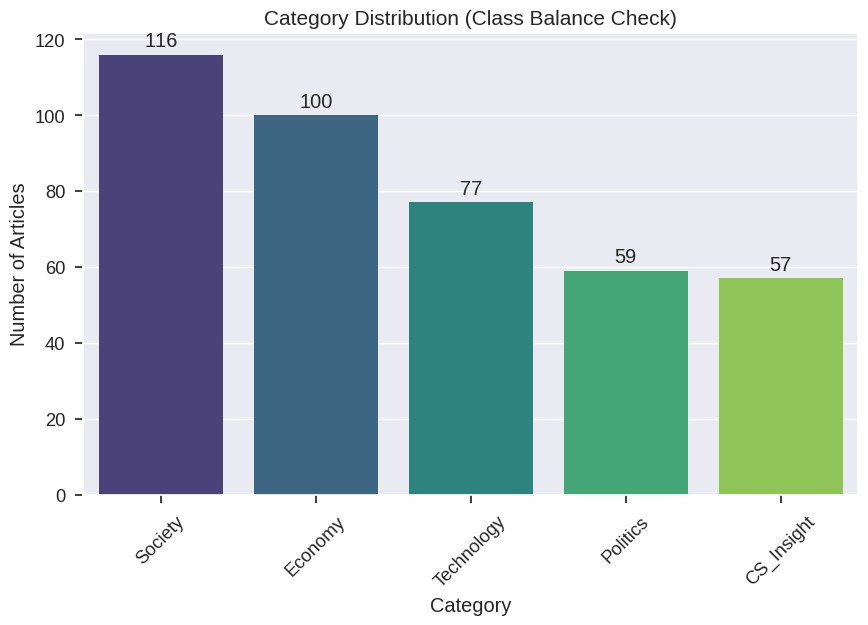

In [ ]:
plt.figure(figsize=(10, 6))

# 카테고리별 개수 시각화
ax = sns.countplot(data=df, x='category',
                   order=df['category'].value_counts().index,
                   palette='viridis')

# 막대 위에 숫자 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Category Distribution (Class Balance Check)', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

### 헤드라인 길이 분포 분석

### 기초 통계 및 분포 형태

- **평균 길이:** 약 62.27 자
    
- **분포 형태:**
    - 시각화 결과, 데이터가 평균선(붉은 점선)을 중심으로 좌우 대칭을 이루는 **정규분포(Normal Distribution)** 와 유사한 형태를 띠고 있다.
        
    - 대부분의 헤드라인이 **40자에서 80자 사이**에 밀집되어 있어, 기사 제목의 호흡이 매우 일정하다는 것을 확인할 수 있다.
    

### 데이터 품질 진단

1. **이상치(Outlier) 점검:**
    
    - **짧은 텍스트:** 20자 미만의 데이터가 소수 관측되나, 빈도수가 매우 낮아 전체 학습에 영향을 줄 수준은 아닌 것으로 판단됩니다.
        
    - **긴 텍스트:** 100자를 초과하는 데이터 역시 거의 없어, 문단 수준의 긴 텍스트가 섞여 들어오는 오류(Noise)는 없는 것으로 확인했다.
        
2. **결론:**
    
    - 극단적으로 길거나 짧은 문장이 없기 때문에, 추후 모델링 단계에서 별도의 길이 제한(Truncation)이나 과도한 패딩(Padding) 처리를 고민하지 않아도 될 것으로 생각한다.

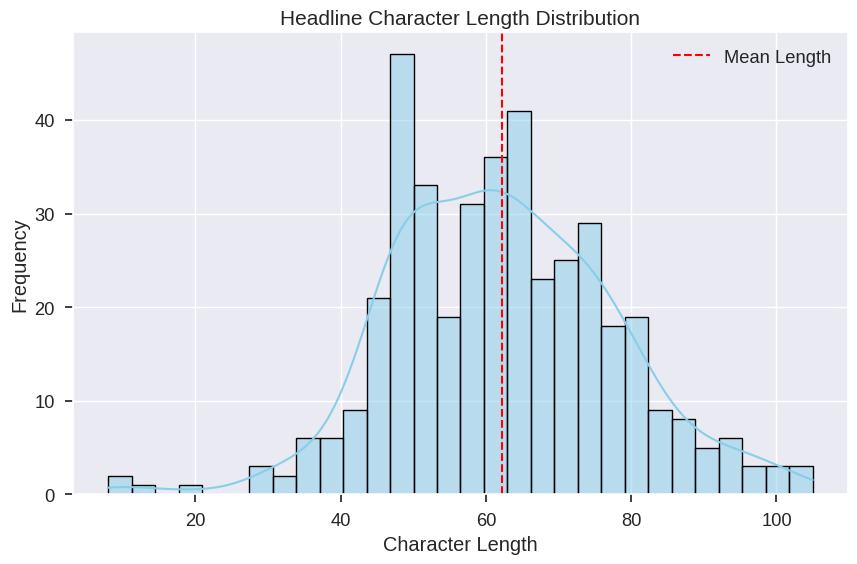

평균 헤드라인 길이: 62.27 글자


In [ ]:
# 글자 수(Character Length) 컬럼 생성
df['char_length'] = df['headline'].apply(len)

plt.figure(figsize=(10, 6))

# 히스토그램 그리기
sns.histplot(data=df, x='char_length', bins=30, kde=True, color='skyblue')

plt.title('Headline Character Length Distribution', fontsize=15)
plt.xlabel('Character Length')
plt.ylabel('Frequency')

# 평균 길이 표시선
plt.axvline(df['char_length'].mean(), color='red', linestyle='--', label='Mean Length')
plt.legend()
plt.show()

print(f"평균 헤드라인 길이: {df['char_length'].mean():.2f} 글자")

### CS_Insight 카테고리 키워드 정합성 검증 (Keyword Validity Check)

앞서 정의한 `CS_Insight` 카테고리는 RSS 원본 데이터가 아닌, **'전공 관련 키워드 포함 여부'** 라는 독자적인 규칙(Rule-based)에 의해 생성되었다. 따라서 해당 카테고리로 분류된 기사들이 **실제로 기술(Tech) 및 CS 도메인과 관련이 있는지 검증**하는 과정이 필수적이다.

이를 위해 `CS_Insight` 데이터의 텍스트를 분석하여, 불용어(Stopwords)를 제외한 **상위 빈도 단어(Top 10 Keywords)** 를 시각화하였다.

### 분석 방법

1. **텍스트 정제:** 모든 헤드라인을 소문자로 변환하고, 정규표현식을 이용해 3글자 이상의 의미 있는 단어만 추출하였다.

2. **불용어 제거:** 'the', 'and', 'will' 등 문법적 기능만 하는 단어들을 제거하여 분석의 정확도를 높였다.

3. **빈도 분석:** `Counter` 객체를 사용하여 가장 많이 등장한 단어 상위 10개를 추출하였다.

### 시각화 결과 및 해석

- **주요 키워드:** 분석 결과 **`tech`**, **`data`**, **`google`** 과 같은 단어들이 상위권을 차지하였다.
    
- **정합성 확인:**
    
    - 추출된 단어들은 정치(Politics)나 일반 경제(Economy) 뉴스에서 주로 등장하는 단어(Election, Tax, Campaign 등)와 뚜렷하게 구분되는 **기술적 특성(Technical Specificity)** 을 보인다.
        
    - 이는 본 프로젝트에서 설계한 **'키워드 기반 재분류(Re-labeling) 알고리즘'이 의도한 대로 정확하게 작동**하여, 방대한 뉴스 데이터 속에서 CS 전공자에게 필요한 정보를 효과적으로 필터링했음을 시사한다.

### 결론

구축된 `CS_Insight` 데이터셋은 노이즈가 적고 도메인 적합성(Relevance)이 높아, 향후 진행될 **머신러닝 모델 학습(Classification Task)의 고품질 학습 데이터(Ground Truth)로 활용하기에 적합**하다는 결론을 도출하였다.


/tmp/ipython-input-3755827899.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, y='Word', x='Count', palette='magma')


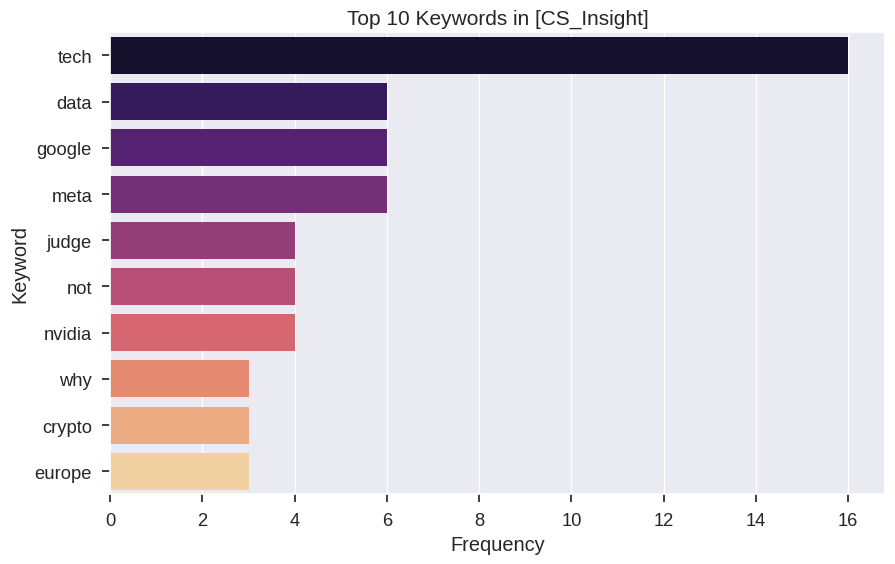

In [ ]:
# CS_Insight 카테고리 데이터만 추출
cs_df = df[df['category'] == 'CS_Insight']

if not cs_df.empty:
    # 텍스트 전처리: 소문자 변환 및 단어 추출
    all_text = ' '.join(cs_df['headline'].astype(str)).lower()
    words = re.findall(r'\b\w{3,}\b', all_text) # 3글자 이상 단어만

    # 불용어(Stopwords) 제거 (의미 없는 단어)
    stopwords = ['the', 'and', 'for', 'with', 'from', 'that', 'this', 'after',
                 'over', 'says', 'will', 'new', 'about', 'more', 'into']
    words = [w for w in words if w not in stopwords]

    # 빈도수 계산 (Top 10)
    common_words = Counter(words).most_common(10)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=words_df, y='Word', x='Count', palette='magma')

    plt.title('Top 10 Keywords in [CS_Insight]', fontsize=15)
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.show()
else:
    print("CS_Insight 데이터가 부족하여 그래프를 그릴 수 없습니다.")

### 카테고리별 단어 수 분포 비교 (Comparative Analysis of Word Counts)

헤드라인의 글자 수(Character)뿐만 아니라, **단어 수(Word Count)** 의 분포가 카테고리별로 유의미한 차이를 보이는지 Boxplot(상자 수염 그림)을 통해 분석하였다.

만약 특정 카테고리(예: Politics)의 기사 제목이 타 카테고리에 비해 현저히 길거나 짧다면, 머신러닝 모델이 텍스트의 '의미'가 아닌 **'길이'를 힌트(Shortcut)로 삼아 분류하는 편향(Bias)이 발생**할 수 있기 때문이다.

### 시각화 해석 기준

- **박스(Box):** 데이터의 중간 50%(IQR)가 모여 있는 구간.
- **가로선(Median):** 각 카테고리 헤드라인 단어 수의 중앙값.
- **점(Points):** 일반적인 범위를 벗어난 이상치(Outlier).

### 분석 결과

- **중앙값(Median)의 일치:**
    
    - 그래프를 확인한 결과, 5개 카테고리 모두 중앙값이 약 10~11 단어 부근에 거의 일직선으로 위치하고 있다.
    - 이는 분야에 상관없이 뉴스 헤드라인의 호흡(길이)이 매우 일정하다는 것을 보여준다.
    
- **분포 및 이상치:**
    
    - 전체적으로 모든 박스(Box)의 크기와 위치가 비슷하다.

### 결론

카테고리별로 텍스트 길이에 대한 극단적인 차이가 발견되지 않았다. 따라서 향후 구축할 모델은 텍스트의 '길이 정보'가 아닌, **'단어의 출현 패턴(TF-IDF 등)'과 '문맥(Context)'에 집중하여 공정한 학습을 수행**할 수 있을 것으로 기대된다.

/tmp/ipython-input-854874011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='word_count', palette='pastel')


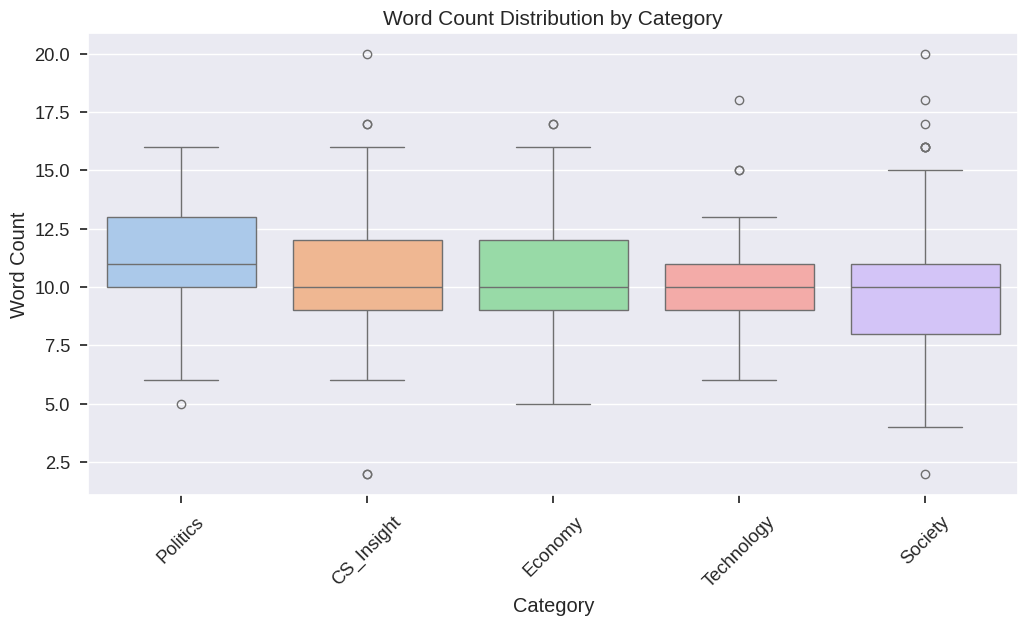

In [ ]:
# 단어 수(Word Count) 컬럼 생성
df['word_count'] = df['headline'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))

# 박스플롯 그리기
sns.boxplot(data=df, x='category', y='word_count', palette='pastel')

plt.title('Word Count Distribution by Category', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

### 최종 결론 및 향후 계획 (Conclusion & Future Works)

본 과제(Assignment 4)를 통해 뉴스 데이터 수집부터 정제, 그리고 탐색적 데이터 분석(EDA)까지의 과정을 수행하였다. 분석 결과를 요약하고 이를 바탕으로 한 향후 모델링 계획을 정리하면 다음과 같다.

### 데이터 분석 요약 (Summary)

1. **데이터 무결성 확보:** 결측치(Null)와 중복 데이터가 **0건**임을 확인하였으며, 이상치(Outlier) 또한 발견되지 않아 별도의 복잡한 정제 과정 없이 즉시 학습에 투입 가능한 Dataset을 구축하였다.

2. **`CS_Insight` 가설 검증:** 독자적으로 설계한 키워드 필터링 로직이 실제 기술 관련 뉴스들을 정확하게 분류해냈음을 확인하였으며, 클래스 분포 또한 최대/최소 비율이 약 **2:1** 수준으로 학습하기에 안정적인 균형을 유지하고 있다.

3. **편향 요소 배제:** 카테고리별 텍스트 길이(Word Count)에 큰 차이가 없어, 모델이 텍스트의 길이가 아닌 **'실질적인 내용(Semantics)'** 을 학습할 수 있는 환경이 조성되었다.


### 한계점 및 개선 방안

- **데이터의 절대적 양:** 현재 확보된 약 400여 개의 데이터는 초기 학습(Baseline)용으로는 충분하나, 고성능 모델을 구축하기에는 다소 부족할 수 있다.

- **개선:** RSS 수집 스크립트를 주기적으로 실행하여 데이터를 누적(Accumulate)함으로써, 데이터 양 부족 문제를 점진적으로 해결할 예정이다.

코드 작성 과정에서 Google Gemini를 코딩 어시스턴트로 활용하여, 로직 구현 및 오류 수정을 진행하였습니다.